**Task 8**
1. Pergunakan data train(1).csv lalu baca dataset
2. baca dataset
3. lakukan feature engineering jika dibutuhkan seperti memodifikasi bentuk dataset : dapat
dilakukan exponensial, logaritma, lag, regularization, dll) agar model mampu memprediksi data
selanjutnya lebih baik. Dimana label dataset adalah Y
4. tampilkan visualisasi regresi
5. Evaluasi model dengan MAE dan RMSE, jelaskan apa arti dari evaluasi tersebut, dan perbedaan
dari MAE dan RMSE.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Bootcamp Data Bangalore/Dataset/train(1).csv')

# **Data Understanding**

In [ ]:
df.shape

(700, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
df.sample(15)

,x,y
97,73.0,71.980208
305,88.0,85.860779
289,41.0,41.214699
690,73.0,69.717878
377,28.0,26.221965
331,9.0,5.225760
130,68.0,63.531257
22,58.0,57.043103
526,37.0,41.143864
335,3.0,1.652309


In [ ]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


# **Data Cleaning**

In [ ]:
# menghilangkan nilai yang kosong
df.dropna(inplace=True)

# **EDA**

In [ ]:
!pip install pywedge
import pywedge as pw
mc = pw.Pywedge_Charts(df, c=None, y = 'y')
charts = mc.make_charts()

/usr/local/lib/python3.7/dist-packages/pywedge/pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.X = self.train.drop(self.y,1)


HTML(value='<h2>Pywedge Make_Charts </h2>')

Tidak diperlukan feature engineering karena data sudah seimbang dari segi range dan juga terlihat bahwa data memiliki korelasi positif yang kuat, terlebih lagi data hanya memiliki dua fitur.

# **Regression**

In [ ]:
a = df[['x']]
b = df[['y']]
x = np.array(a)
y = np.array(b)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3,random_state=15)

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
pred = regressor.predict(xtest)

Text(0, 0.5, 'y')

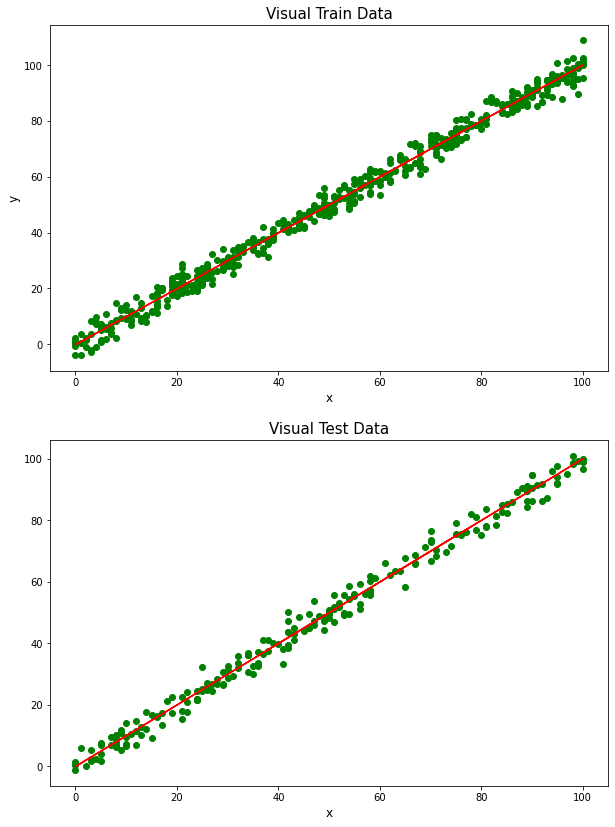

In [ ]:
fig, ax = plt.subplots(2,figsize=(10,14))
ax[0].scatter(xtrain, ytrain, color="green")
ax[0].plot(xtrain, regressor.predict(xtrain), color="red")
ax[0].set_title("Visual Train Data",fontsize=15)
ax[0].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

ax[1].scatter(xtest, ytest, color="green")
ax[1].plot(xtrain, regressor.predict(xtrain), color="red")
ax[1].set_title("Visual Test Data",fontsize=15)
ax[1].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

In [ ]:
# Metode Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
# RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))
# MAE
print("MAE: %.2f" % mean_absolute_error(ytest, pred))

RMSE: 2.79
MAE: 2.22


In [ ]:
print("akurasi data train:", round(regressor.score(xtrain, ytrain),3))
print("akurasi data test:", round(regressor.score(xtest, ytest),3))

akurasi data train: 0.991
akurasi data test: 0.99


## **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.5)
ridge_model.fit(xtrain, ytrain)

Ridge(alpha=0.5)

In [ ]:
pred = ridge_model.predict(xtest)

Text(0, 0.5, 'y')

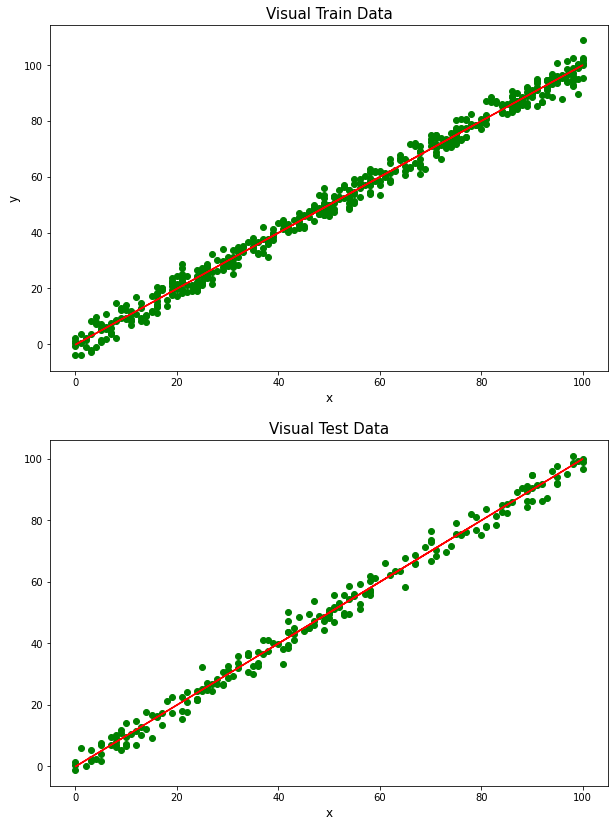

In [ ]:
fig, ax = plt.subplots(2,figsize=(10,14))
ax[0].scatter(xtrain, ytrain, color="green")
ax[0].plot(xtrain, ridge_model.predict(xtrain), color="red")
ax[0].set_title("Visual Train Data",fontsize=15)
ax[0].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

ax[1].scatter(xtest, ytest, color="green")
ax[1].plot(xtrain, ridge_model.predict(xtrain), color="red")
ax[1].set_title("Visual Test Data",fontsize=15)
ax[1].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

In [ ]:
# Metode Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))
# The MAE
print("MAE: %.2f" % mean_absolute_error(ytest, pred))

RMSE: 2.79
MAE: 2.22


In [ ]:
print("akurasi data train:", round(ridge_model.score(xtrain, ytrain),3))
print("akurasi data test:", round(ridge_model.score(xtest, ytest),3))

akurasi data train: 0.991
akurasi data test: 0.99


## **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha= 5)
lasso_model.fit(xtrain, ytrain)

Lasso(alpha=5)

In [ ]:
pred = lasso_model.predict(xtest)

Text(0, 0.5, 'y')

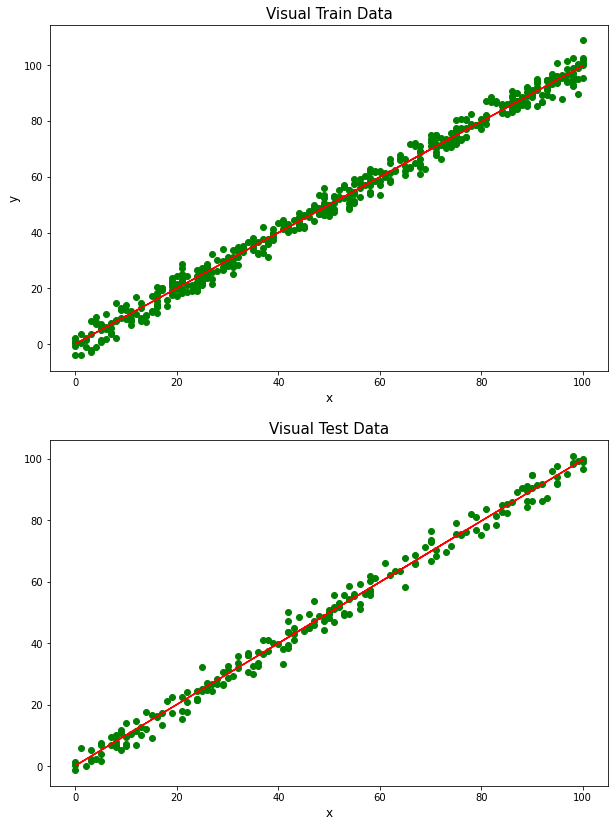

In [ ]:
fig, ax = plt.subplots(2,figsize=(10,14))
ax[0].scatter(xtrain, ytrain, color="green")
ax[0].plot(xtrain, lasso_model.predict(xtrain), color="red")
ax[0].set_title("Visual Train Data",fontsize=15)
ax[0].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

ax[1].scatter(xtest, ytest, color="green")
ax[1].plot(xtrain, lasso_model.predict(xtrain), color="red")
ax[1].set_title("Visual Test Data",fontsize=15)
ax[1].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

In [ ]:
# Metode Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=True))
# The MAE
print("MAE: %.2f" % mean_absolute_error(ytest, pred))

RMSE: 7.76
MAE: 2.23


In [ ]:
print("akurasi data train:", round(lasso_model.score(xtrain, ytrain),3))
print("akurasi data test:", round(lasso_model.score(xtest, ytest),3))

akurasi data train: 0.991
akurasi data test: 0.99


# **Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=3)
elastic_model.fit(xtrain, ytrain)

ElasticNet(alpha=3)

In [ ]:
pred = elastic_model.predict(xtest)

Text(0, 0.5, 'y')

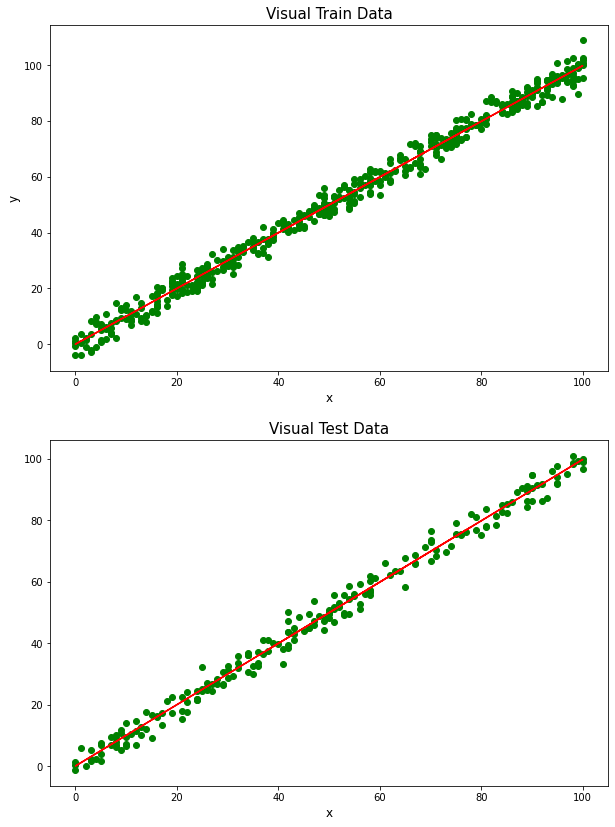

In [ ]:
fig, ax = plt.subplots(2,figsize=(10,14))
ax[0].scatter(xtrain, ytrain, color="green")
ax[0].plot(xtrain, elastic_model.predict(xtrain), color="red")
ax[0].set_title("Visual Train Data",fontsize=15)
ax[0].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

ax[1].scatter(xtest, ytest, color="green")
ax[1].plot(xtrain, elastic_model.predict(xtrain), color="red")
ax[1].set_title("Visual Test Data",fontsize=15)
ax[1].set_xlabel("x",fontsize=12); ax[0].set_ylabel("y",fontsize=12)

In [ ]:
# Metode Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=True))
# The MAE
print("MAE: %.2f" % mean_absolute_error(ytest, pred))

RMSE: 7.75
MAE: 2.22


In [ ]:
print("akurasi data train:", round(elastic_model.score(xtrain, ytrain),3))
print("akurasi data test:", round(elastic_model.score(xtest, ytest),3))

akurasi data train: 0.991
akurasi data test: 0.99


# **Kesimpulan**

Mean Absolute Error (MAE) dan Root mean squared error (RMSE) adalah dua metrik paling umum yang digunakan untuk mengukur akurasi. Mean Absolute Error (MAE) mengukur besarnya rata-rata kesalahan dalam serangkaian prediksi, tanpa mempertimbangkan arahnya sedangkan Root mean squared error (RMSE) adalah aturan penilaian kuadrat yang juga mengukur besarnya rata-rata kesalahan. 
> Persamaan
>>MAE dan RMSE merupakan cara untuk mengukur kesalahan model berdasarkan rata- rata kesalahan.

>Perbedaan 
>>1.   RMSE lebih sensitif outlier.
2.   RMSE memiliki kesalahan error lebih besar dibandingkan MAE.





